##  read the merged dataframe

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
current_dir = %pwd
file_dir = os.path.join(current_dir, "..", "data/processed", "merged_dataset.csv")
file_dir

'/Users/gilayache/PycharmProjects/Final-project-feature-selection-in-gene-expression/notebooks/../data/processed/merged_dataset.csv'

In [3]:
df = pd.read_csv(file_dir)
df.head()

,samplename,A2M,A4GNT,AAAS,AACS,AADAC,AAK1,AAMP,AARS,AASDHPPT,...,ZXDA,ZXDC,ZYX,ZZEF1,ER,PAM50,time,event,Lympho,cluster2
0,F1,-1.098234,-0.615048,-1.670827,-0.539020,0.098325,-1.989513,-0.376823,0.439949,-0.990079,...,2.314161,0.481213,-0.277116,-1.183044,1,Basal,2367,0,2.602223,6
1,F2,0.110096,-0.615048,0.248934,0.032084,0.262344,-1.211690,-0.480422,-0.933772,-0.392950,...,0.239147,-1.087827,1.399415,-1.203251,2,LumA,2367,0,1.104544,5
2,F3,-1.779393,-0.615048,-0.422635,0.392158,-0.711190,-0.210792,1.145994,1.938679,-0.093394,...,-1.593300,0.110658,0.481292,-0.641483,2,LumB,2168,1,0.581018,5
3,F4,0.268360,-0.615048,0.236302,0.563540,-0.373168,-0.839605,0.753860,1.562852,0.933071,...,1.002772,0.294238,0.449014,0.854496,2,LumA,2416,0,2.882004,6
4,F5,0.616851,-0.615048,-0.988261,-0.083663,0.067739,-0.732227,-0.760831,-0.655655,-0.962107,...,1.244214,1.526451,0.095333,0.700526,2,Normal,2389,0,1.013356,4


In [4]:
df.shape, len(df.samplename.unique())

((3069, 9271), 3069)

### Meaning each row is a unique sample

## ER or Lympho are the labels

In [5]:
df.ER.value_counts()

2    2450
1     619
Name: ER, dtype: int64

<AxesSubplot:xlabel='Lympho', ylabel='Density'>

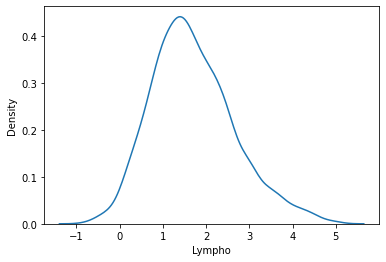

In [6]:
sns.kdeplot(data=df, x="Lympho")

### PAM50 is a 50-gene signature that classifies breast cancer into five molecular intrinsic subtypes: Luminal A, Luminal B, HER2-enriched, Basal-like, and Normal-like (1, 5). Each of the five molecular subtypes varies by their biological properties and prognoses (6, 7).

In [7]:
df.PAM50.value_counts()

LumA      1540
LumB       695
Basal      325
Her2       307
Normal     202
Name: PAM50, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Density'>

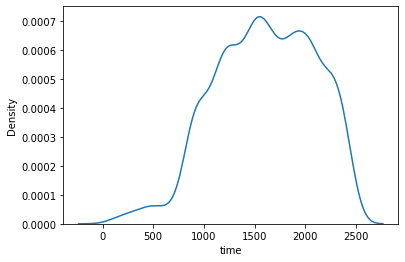

In [8]:
sns.kdeplot(data=df, x="time")

In [9]:
df.event.value_counts()

0    2747
1     322
Name: event, dtype: int64

In [10]:
df.cluster2.value_counts()

5    1285
4     919
6     865
Name: cluster2, dtype: int64

In [34]:
df.iloc[:,1:-6]

,A2M,A4GNT,AAAS,AACS,AADAC,AAK1,AAMP,AARS,AASDHPPT,AASS,...,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN5A,ZW10,ZWINT,ZXDA,ZXDC,ZYX,ZZEF1
0,-1.098234,-0.615048,-1.670827,-0.539020,0.098325,-1.989513,-0.376823,0.439949,-0.990079,-1.715000,...,-0.271914,-0.607976,-0.349919,-1.740601,0.586037,-0.067762,2.314161,0.481213,-0.277116,-1.183044
1,0.110096,-0.615048,0.248934,0.032084,0.262344,-1.211690,-0.480422,-0.933772,-0.392950,-0.401287,...,0.316885,-0.130563,1.064711,0.578536,-0.270144,-0.381822,0.239147,-1.087827,1.399415,-1.203251
2,-1.779393,-0.615048,-0.422635,0.392158,-0.711190,-0.210792,1.145994,1.938679,-0.093394,-2.103685,...,-2.060746,-1.840604,-1.081964,-0.807412,1.520787,1.682110,-1.593300,0.110658,0.481292,-0.641483
3,0.268360,-0.615048,0.236302,0.563540,-0.373168,-0.839605,0.753860,1.562852,0.933071,0.329659,...,-0.812436,-0.836057,0.505783,-0.035067,-0.184722,1.094690,1.002772,0.294238,0.449014,0.854496
4,0.616851,-0.615048,-0.988261,-0.083663,0.067739,-0.732227,-0.760831,-0.655655,-0.962107,1.256546,...,1.349677,-0.114500,0.833477,0.179142,-0.989962,-2.177457,1.244214,1.526451,0.095333,0.700526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,-0.186538,2.274780,-0.234717,0.508552,-0.711190,0.906386,0.382058,-0.366158,0.390974,-0.704453,...,-0.763880,-0.616217,0.663460,0.686906,0.108214,0.136289,-0.124213,-0.035275,-0.492908,-0.319413
3065,-0.071234,0.598461,-0.501922,0.663004,-0.711190,-0.857593,0.431723,1.297162,1.165770,-0.492953,...,-0.718535,0.694139,-0.792876,-0.627458,-0.511481,1.337403,-0.968470,-0.402870,-0.921020,-0.002998
3066,1.535495,1.185567,0.165044,-0.257163,-0.711190,0.192122,-0.067868,0.392406,1.469082,1.987267,...,2.654414,0.704425,0.925177,-0.031883,0.897376,-1.109247,0.820061,1.185099,0.156364,2.104671
3067,-2.769459,-0.615048,0.883363,-0.884103,-0.056693,1.461789,0.812750,2.299910,2.563744,-2.053640,...,-1.600549,1.773083,1.361701,-0.892728,0.662348,1.341542,2.011855,0.191484,-3.318711,-1.464728
